In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import seaborn as sns
from configs import engram_dir

### Parameters

In [27]:
internal_dim = 16
generic_exp_name = 'iqn4_discount0.7_randreward_shuffobs'
network_yaml = 'iqn'
episode = 600 #350
hue_order = ['mf0', 'mf1', 'mf-1']

In [28]:
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [29]:
with open(f'{analysis_dir}quantile_df_ep{episode}.p', 'rb') as f:
    df = pickle.load(f)

# Quantile values far from goal

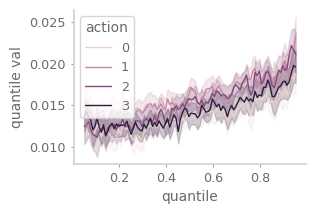

In [30]:
_df = df[df['distance from goal'] > 10]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df)
plt.show()

# Quantile values close to goal

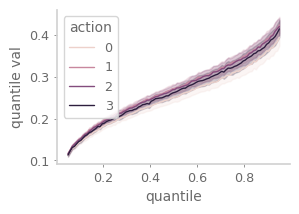

In [31]:
_df = df[df['distance from goal'] < 3]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df)
plt.show()

# Specific examples

In [40]:
iteration = 1
model='mf0'

In [41]:
_df = df.copy()
_df = _df[_df['iteration']== iteration]
_df = _df[_df['model'] == f'{generic_exp_name}_{model}']
print(np.unique(_df['goal state'])) # There should only be one
goal_state = np.unique(_df['goal state'])[0]
goal_x, goal_y = goal_state

[list([5, 6])]


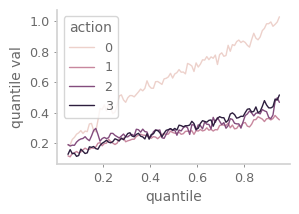

In [42]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_close = _df[(_df['x']==goal_x+1) & (_df['y']==goal_y)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_close)
plt.show()

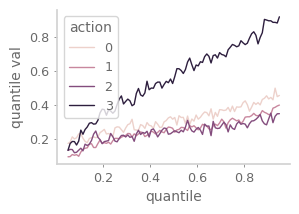

In [43]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_close = _df[(_df['x']==goal_x) & (_df['y']==goal_y-1)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_close)
plt.show()

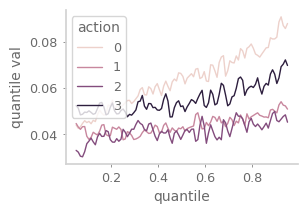

In [44]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_far = _df[(_df['x']==7) & (_df['y']==1)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_far)
plt.show()

# Visualize pdf

In [45]:
from scipy import interpolate
from scipy.interpolate import UnivariateSpline

[list([5, 6])]


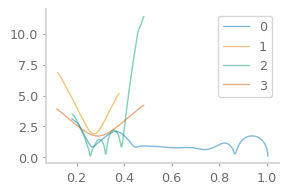

In [49]:
_df = df.copy()
_df = _df[_df['iteration']== iteration]
_df = _df[_df['model'] == f'{generic_exp_name}_{model}']
print(np.unique(_df['goal state'])) # There should only be one
goal_state = np.unique(_df['goal state'])[0]
goal_x, goal_y = goal_state
_df = _df[(_df['x']==goal_x+1) & (_df['y']==goal_y)]
plt.figure(figsize=(3,2))
for action in np.unique(_df['action']):
    _df_action = _df[_df['action']==action]
    quantile = _df_action['quantile'].to_numpy()
    quantile_val = _df_action['quantile val'].to_numpy()
    
    # Smooth before getting pdf
    spline = UnivariateSpline(quantile, quantile_val, s=0.05)
    dense_quantiles = np.linspace(quantile.min(), quantile.max(), 100)
    smoothed_values = spline(dense_quantiles)
    quantile = dense_quantiles
    quantile_val = smoothed_values
    
    # Sort by quantile-val (the x axis)
    sort_idxs = np.argsort(quantile_val)
    quantile = quantile[sort_idxs]
    quantile_val = quantile_val[sort_idxs]
    
    # Get PDF and plot
    pdf = np.gradient(quantile_val, quantile)
    pdf[pdf < 0] = 0
    pdf_area = np.trapz(pdf, quantile_val)
    pdf = pdf/pdf_area
    plt.plot(quantile_val, pdf, label=action, alpha=0.5)
plt.legend()
plt.show()

[list([5, 6])]


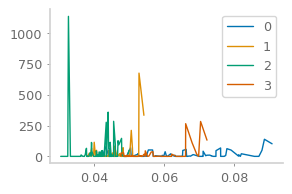

In [47]:
_df = df.copy()
_df = _df[_df['iteration']== iteration]
_df = _df[_df['model'] == f'{generic_exp_name}_{model}']
print(np.unique(_df['goal state'])) # There should only be one
goal_state = np.unique(_df['goal state'])[0]
goal_x, goal_y = goal_state
_df = _df[(_df['x']==7) & (_df['y']==1)]
plt.figure(figsize=(3,2))
for action in np.unique(_df['action']):
    _df_action = _df[_df['action']==action]
    quantile = _df_action['quantile'].to_numpy()
    quantile_val = _df_action['quantile val'].to_numpy()
    
    # Smooth before getting pdf
#     spline = UnivariateSpline(quantile, quantile_val, s=0.005)
#     dense_quantiles = np.linspace(quantile.min(), quantile.max(), 100)
#     smoothed_values = spline(dense_quantiles)
#     quantile = dense_quantiles
#     quantile_val = smoothed_values
    
    # Sort by quantile-val (the x axis)
    sort_idxs = np.argsort(quantile_val)
    quantile = quantile[sort_idxs]
    quantile_val = quantile_val[sort_idxs]
    
    # Get PDF and plot
    pdf = np.gradient(quantile_val, quantile)
    pdf[pdf < 0] = 0
    pdf_area = np.trapz(pdf, quantile_val)
    pdf = pdf/pdf_area
    plt.plot(quantile_val, pdf, label=action)
plt.legend()
plt.show()